In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import sys


In [2]:
PROJ_ROOT = '/homes/ar2342/one_more_dir/contextual_frogs/'

In [3]:
paradigms = ['spontaneous','evoked']

dfs = {paradigm:{} for paradigm in paradigms}
for paradigm in paradigms:
    for i in range(1,9):
        dfs[paradigm][i] = pd.read_csv(f'{PROJ_ROOT}/../../frogs_project/data/COIN_data/trial_data_{paradigm}_recovery_participant{i}.csv')


In [4]:
for paradigm in paradigms:
    print(f'\n\n {paradigm}:')
    for name in list(dict.fromkeys(dfs[paradigm][2].BlockName)):
        print(f'trials in block {name}: {sum(dfs[paradigm][2].BlockName == name)}')



 spontaneous:
trials in block Null: 50
trials in block FieldA: 120
trials in block PostRest: 5
trials in block FieldB: 15
trials in block Clamp150: 150


 evoked:
trials in block Null: 50
trials in block FieldA: 120
trials in block PostRest: 5
trials in block FieldB: 15
trials in block Clamp2: 2
trials in block FieldA2: 2
trials in block Clamp150: 146


In [5]:
all_ys ={paradigm:[] for paradigm in paradigms}
for paradigm, these_dfs in dfs.items():
    for i, df in these_dfs.items():
        y = df.Adaptation.to_numpy()
        y *= np.sign(np.nansum(y))
        x = df.TrialNumber.to_numpy()
        all_ys[paradigm].append(y)


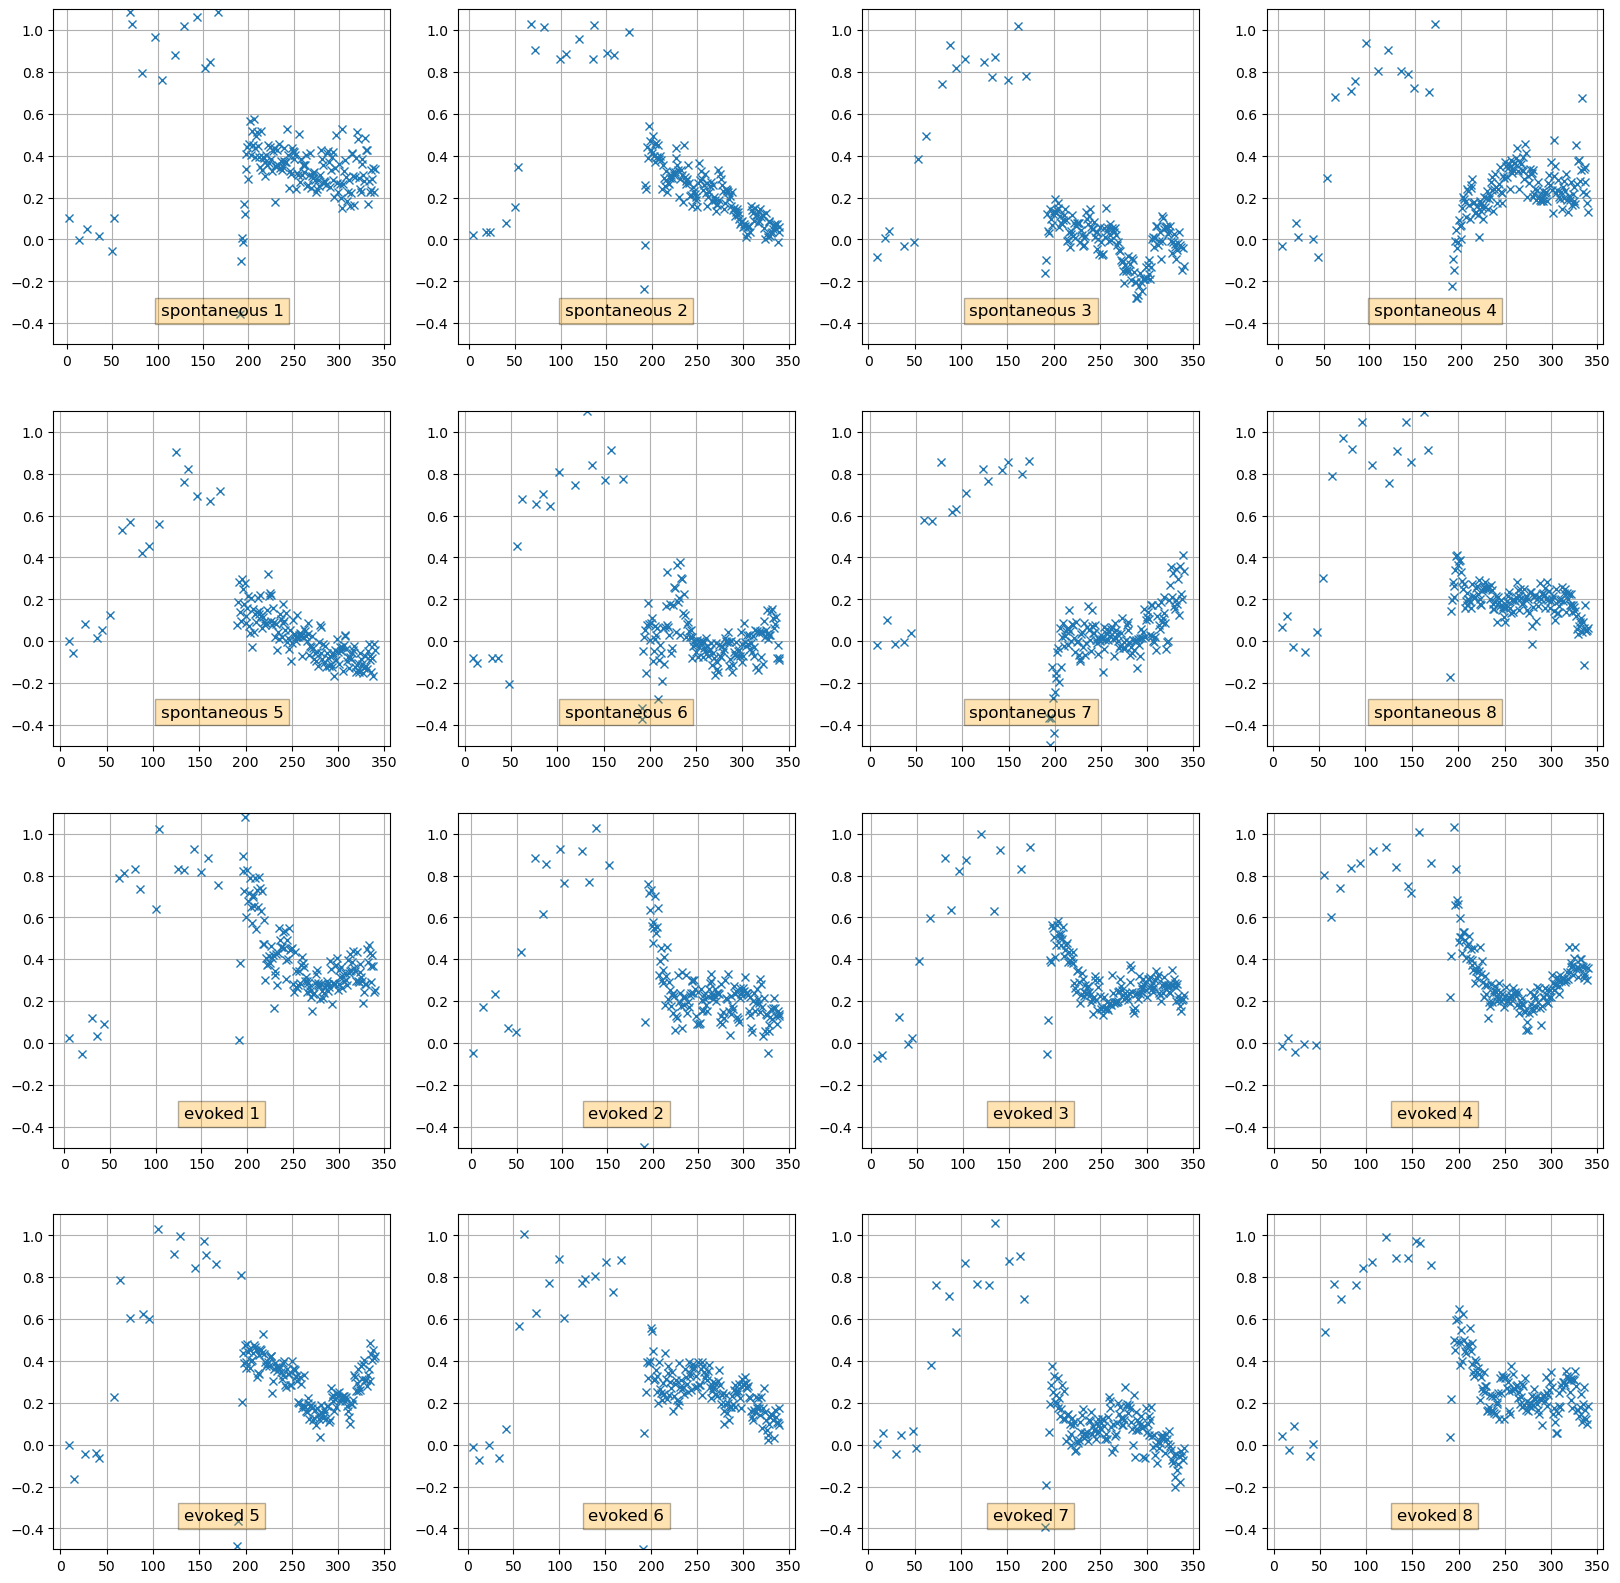

In [6]:
cnt = 1
plt.figure(figsize=(20,20))
for paradigm, these_dfs in dfs.items():
    for i, df in these_dfs.items():
        plt.subplot(4,4,cnt)
        y = df.Adaptation.to_numpy()
        y *= np.sign(np.nansum(y))
        x = df.TrialNumber.to_numpy()
        plt.plot(x, y,'x')
        plt.ylim([-0.5,1.1])
        plt.grid()
        #text box with the name of the paradigm and the participant's number
        plt.text(0.5, 0.1, f'{paradigm} {i}', 
                 horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12,
                 bbox=dict(facecolor='orange', alpha=0.3))
        cnt += 1

In [7]:
all_ys = {paradigm:np.array(all_ys[paradigm]) for paradigm in paradigms}

/tmp/ipykernel_2731038/2401955991.py:1: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(all_ys['spontaneous'],axis=0),'r.')
/tmp/ipykernel_2731038/2401955991.py:2: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(all_ys['evoked'],axis=0),'b.')


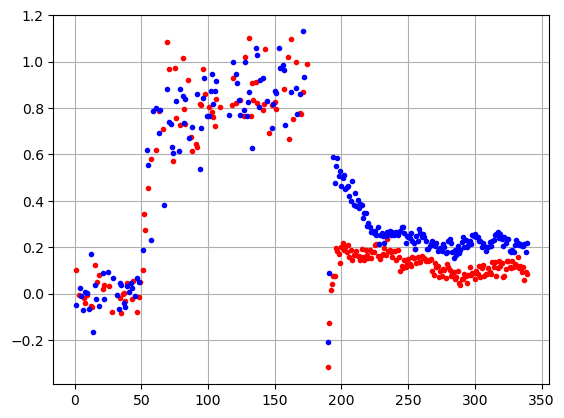

In [8]:
plt.plot(np.nanmean(all_ys['spontaneous'],axis=0),'r.')
plt.plot(np.nanmean(all_ys['evoked'],axis=0),'b.')
plt.grid()

In [9]:
#save mean data to csv file
#create x vector for each of the two paradigms
y_mean_spontaneous = np.nanmean(all_ys['spontaneous'],axis=0)
y_mean_evoked = np.nanmean(all_ys['evoked'],axis=0)
x_spontaneous = np.arange(y_mean_spontaneous.shape[0])
x_evoked = np.arange(y_mean_evoked.shape[0])
np.savetxt(f'{PROJ_ROOT}/experimental/coin_spontaneous_mean.csv', np.concatenate([x_spontaneous, y_mean_spontaneous]).reshape(2,-1).T, delimiter=',')
np.savetxt(f'{PROJ_ROOT}/experimental/coin_evoked_mean.csv', np.concatenate([x_evoked, y_mean_evoked]).reshape(2,-1).T, delimiter=',')

/tmp/ipykernel_2731038/3258408457.py:3: RuntimeWarning: Mean of empty slice
  y_mean_spontaneous = np.nanmean(all_ys['spontaneous'],axis=0)
/tmp/ipykernel_2731038/3258408457.py:4: RuntimeWarning: Mean of empty slice
  y_mean_evoked = np.nanmean(all_ys['evoked'],axis=0)


/tmp/ipykernel_2731038/2356130439.py:1: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(all_ys['spontaneous'],axis=0),'r.')
/tmp/ipykernel_2731038/2356130439.py:2: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(all_ys['evoked'],axis=0),'b.')


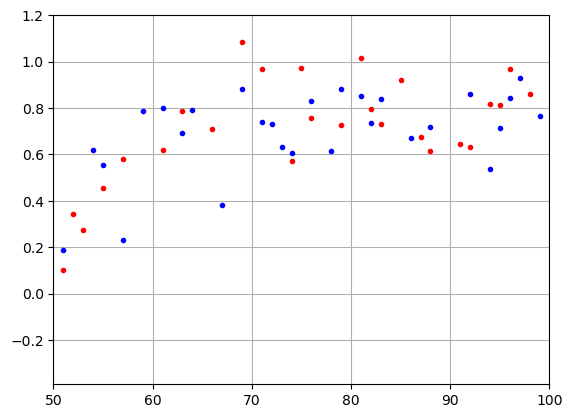

In [10]:
plt.plot(np.nanmean(all_ys['spontaneous'],axis=0),'r.')
plt.plot(np.nanmean(all_ys['evoked'],axis=0),'b.')
plt.xlim([50,100])
plt.grid()

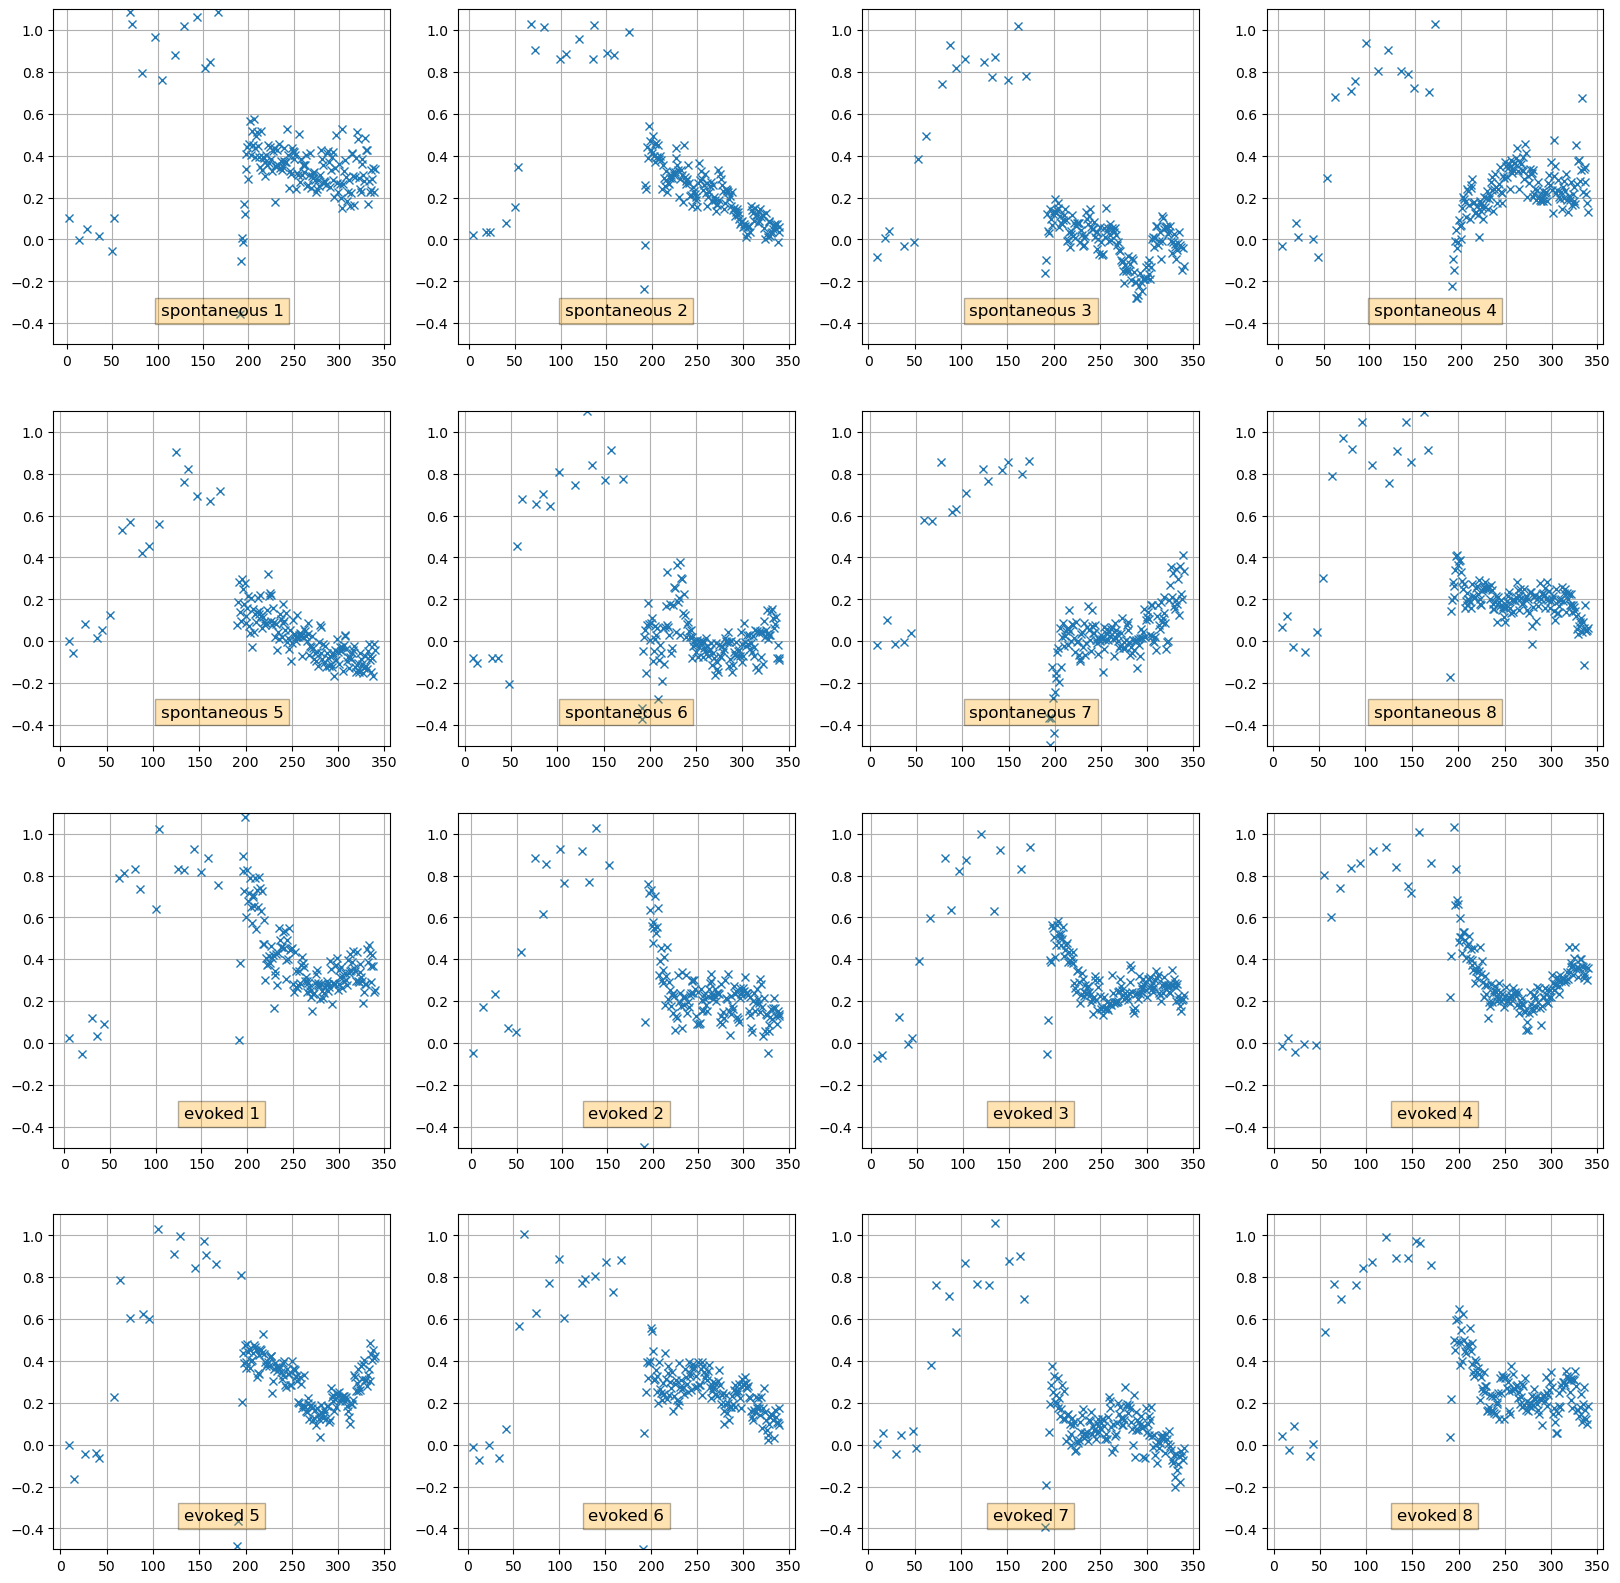

In [12]:
cnt = 1
plt.figure(figsize=(20,20))
for paradigm, these_dfs in dfs.items():
    for i, df in these_dfs.items():
        plt.subplot(4,4,cnt)
        y = df.Adaptation.to_numpy()
        y *= np.sign(np.nansum(y))
        x = df.TrialNumber.to_numpy()
        plt.plot(x, y,'x')
        plt.ylim([-0.5,1.1])
        plt.grid()
        #text box with the name of the paradigm and the participant's number
        plt.text(0.5, 0.1, f'{paradigm} {i}', 
                 horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12,
                 bbox=dict(facecolor='orange', alpha=0.3))
        cnt += 1

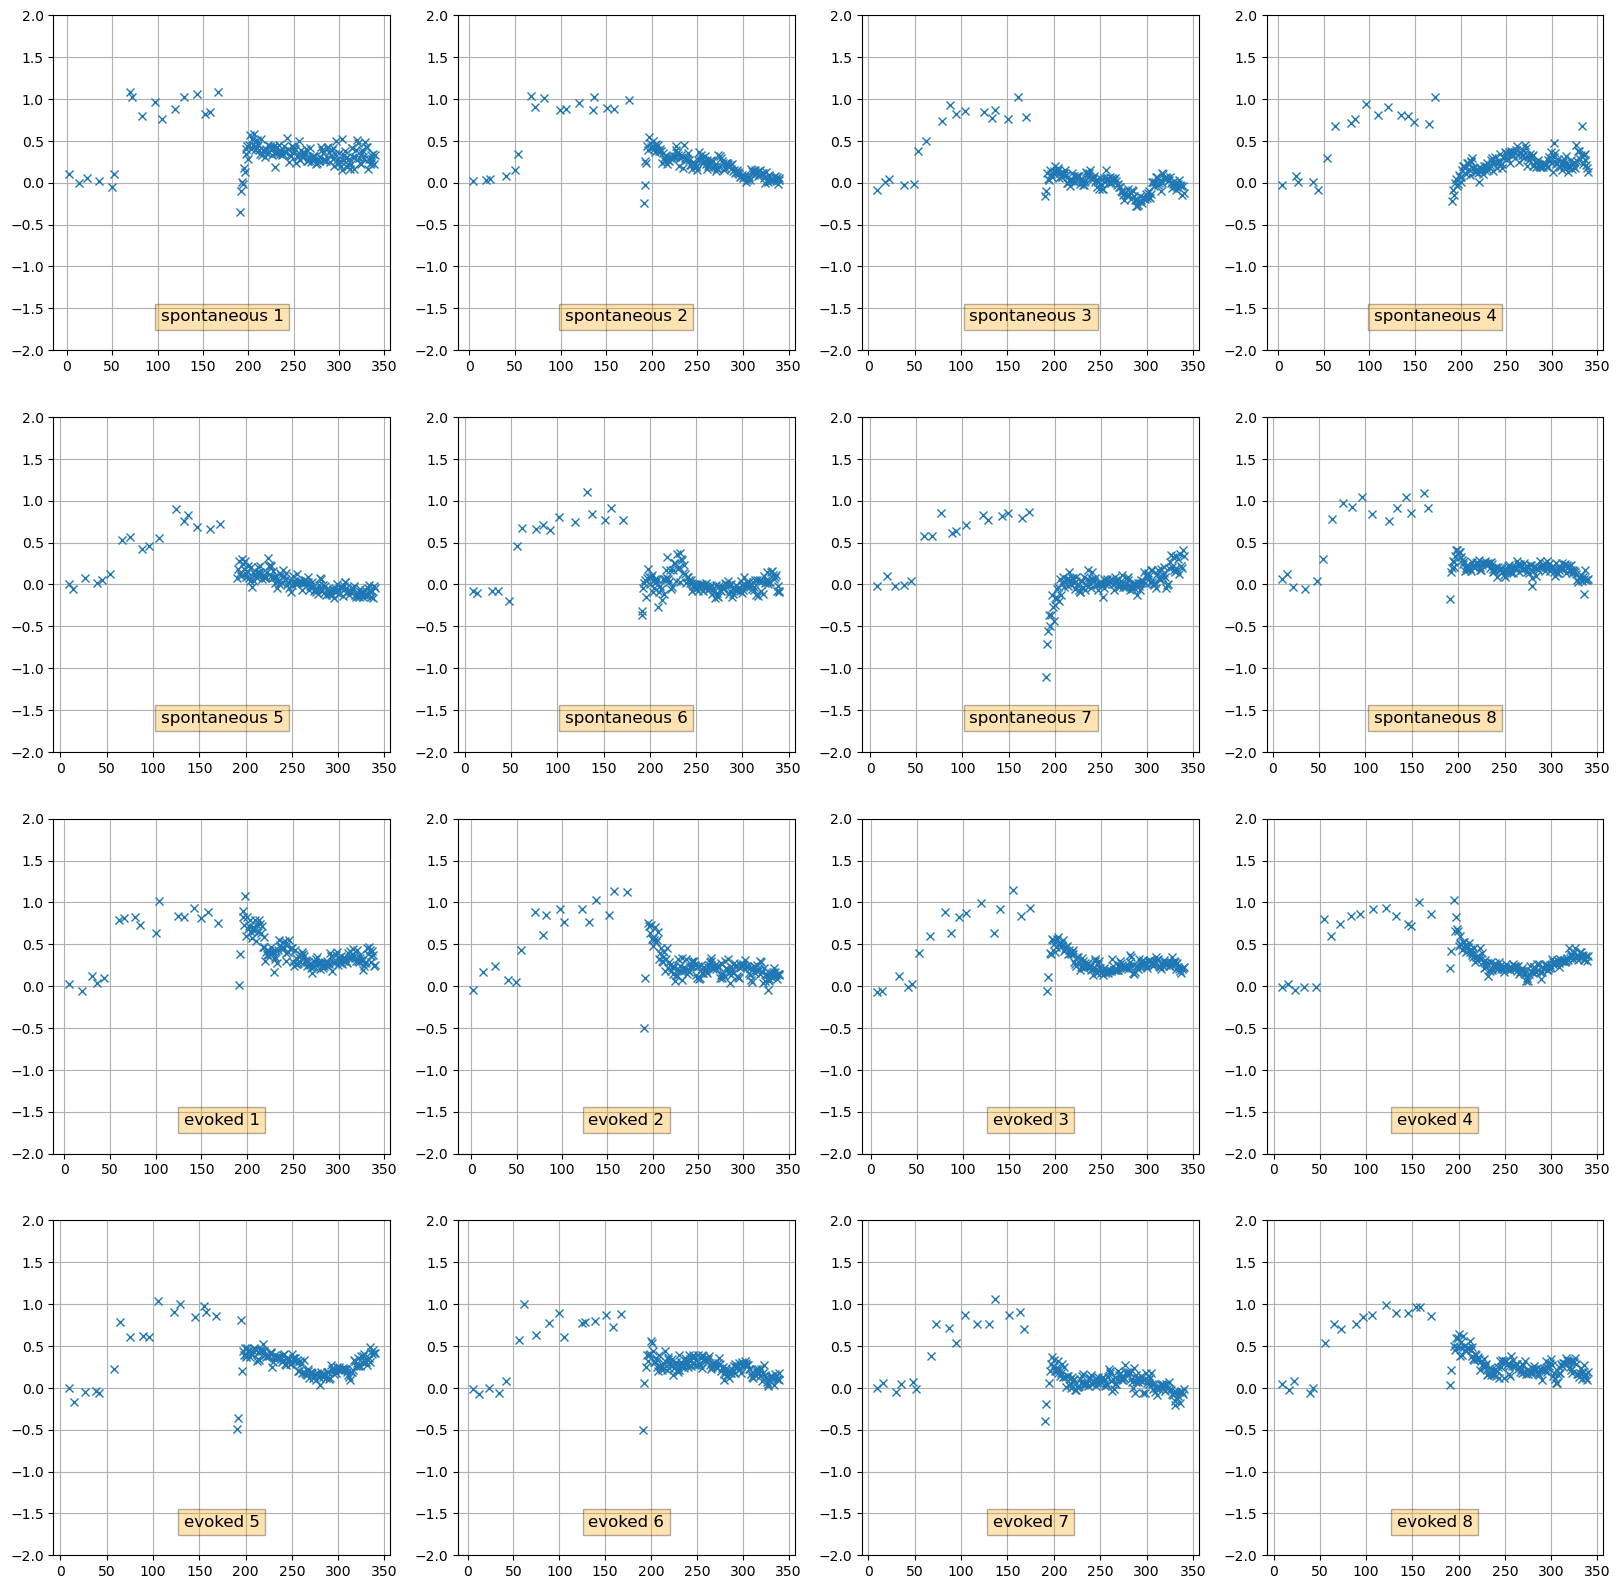

In [15]:
cnt = 1
plt.figure(figsize=(20,20))
for paradigm, these_dfs in dfs.items():
    for i, df in these_dfs.items():
        plt.subplot(4,4,cnt)
        y = df.Adaptation.to_numpy()
        y *= np.sign(np.nansum(y))
        x = df.TrialNumber.to_numpy()
        plt.plot(x, y,'x')
        plt.ylim([-2,2])
        plt.grid()
        #text box with the name of the paradigm and the participant's number
        plt.text(0.5, 0.1, f'{paradigm} {i}', 
                 horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12,
                 bbox=dict(facecolor='orange', alpha=0.3))
        cnt += 1

In [13]:
cnt = 1
plt.figure(figsize=(20,20))
for these_dfs in [dfs_s, dfs_e]:
    for i, df in these_dfs.items():
        plt.subplot(4,4,cnt)
        y = df.Adaptation.to_numpy()
#         y *= np.sign(np.nansum(y))
        x = df.TrialNumber.to_numpy()
        plt.plot(x, y,'x')
        plt.ylim([-1.1,1.1])
        plt.grid()
        cnt += 1

NameError: name 'dfs_s' is not defined

<Figure size 2000x2000 with 0 Axes>

In [ ]:
np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_rows = 1000
dfs['spontaneous'][2]

,BlockName,BlockTrial,FieldConstants_1,FieldConstants_2,FieldType,MissTrial,RestFlag,TrialNumber,TargetPosition_1,TargetPosition_2,MovementReactionTime,MovementDurationTime,Adaptation
0,Null,1,0.00,0.0,0,0,0,1,7.347881e-16,2,0.532423,1.245703,NaN
1,Null,2,0.00,0.0,0,0,0,2,7.347881e-16,2,0.427394,1.695429,NaN
2,Null,3,0.00,0.0,0,0,0,3,7.347881e-16,2,0.605132,1.045896,NaN
3,Null,4,-30.00,-1.4,2,0,0,4,7.347881e-16,2,0.553599,1.045108,0.020297
4,Null,5,0.00,0.0,0,0,0,5,7.347881e-16,2,0.476131,1.150413,NaN
5,Null,6,0.00,0.0,0,0,0,6,7.347881e-16,2,0.535716,1.307160,NaN
6,Null,7,0.00,0.0,0,0,0,7,7.347881e-16,2,0.445545,0.935703,NaN
7,Null,8,0.00,0.0,0,0,0,8,7.347881e-16,2,0.382588,0.729460,NaN
8,Null,9,0.00,0.0,0,0,0,9,7.347881e-16,2,0.432548,1.079676,NaN
9,Null,10,0.00,0.0,0,0,0,10,7.347881e-16,2,0.408476,1.026067,NaN


In [ ]:
dfs['evoked'][2]

,BlockName,BlockTrial,FieldConstants_1,FieldConstants_2,FieldType,MissTrial,RestFlag,TrialNumber,TargetPosition_1,TargetPosition_2,MovementReactionTime,MovementDurationTime,Adaptation
0,Null,1,0.00,0.0,0,0,0,1,7.347881e-16,2,0.325003,1.844115,NaN
1,Null,2,-30.00,-1.4,2,0,0,2,7.347881e-16,2,0.309190,1.238069,-0.049449
2,Null,3,0.00,0.0,0,0,0,3,7.347881e-16,2,0.755053,1.181253,NaN
3,Null,4,0.00,0.0,0,0,0,4,7.347881e-16,2,0.330092,1.847426,NaN
4,Null,5,0.00,0.0,0,0,0,5,7.347881e-16,2,0.287306,0.900024,NaN
5,Null,6,0.00,0.0,0,0,0,6,7.347881e-16,2,0.331119,1.384974,NaN
6,Null,7,0.00,0.0,0,0,0,7,7.347881e-16,2,0.294419,1.234349,NaN
7,Null,8,0.00,0.0,0,0,0,8,7.347881e-16,2,0.248715,1.058960,NaN
8,Null,9,0.00,0.0,0,0,0,9,7.347881e-16,2,0.321602,1.007912,NaN
9,Null,10,0.00,0.0,0,0,0,10,7.347881e-16,2,0.349783,1.043568,NaN
